## Table of contents: 

* [1. Background](#step-1)
* [2. Ask questions to make data-driven decisions](#step-2)
* [3. Prepare data for exploration](#step-3)
    * [3.1 Data sources (accessibility, privacy, and licensing)](#step-3.1)
    * [3.2 Data integrity](#step-3.2)
    * [3.3 Limitations of the datasets](#step-3.3)
* [4. Process data from dirty to clean](#step-4)
    * [4.1 Combining datasets](#step-4.1)
    * [4.2 Filtering out irrelevant information](#step-4.2)
    * [4.3 Handling null values](#step-4.3)
    * [4.4 Summary of data cleaning steps](#step-4.4)
* [5. Ask questions to make data-driven decisions](#step-5)
    * [5.1 Step count](#step-5.1)
    * [5.2 Active minutes](#step-5.2)
    * [5.3 Sleep](#step-5.3)
    * [5.4 Activity, sleep, and compliance throughout the week](#step-5.4)
    * [5.5 Correlations](#step-5.5)
* [6. Conclusions](#step-6)
    * [6.1 Summary of findings](#step-6.1)
    * [6.2 Top insights and recommendations](#step-6.2)

## 1. Background <a class="anchor" id="step-1"></a>

Bellabeat is a wellness technology company that develops smart products for women. They offer a variety of beautifully designed products that empower women with knowledge about their personal health and habits. Bellabeat has grown rapidly since it was founded in 2013 and has opened offices around the world. 

The purpose of this case study is to analyze smart device usage to gain insight into how people use their smart devices, discover opportunities for growth, and provide recommendations for Bellabeat's marketing strategy. The analysis will focus on the Bellabeat app, which provides users with health data related to their activity, sleep, and other lifestyle metrics. 

## 2. Ask questions to make data driven-decisions. <a class="anchor" id="step-2"></a>

**Business task:**

The objectives of this project are to analyze non-Bellabeat fitness tracker data to gain insight into how consumers use smart devices and to provide high-level recommendations for Bellabeat’s marketing strategy. The analysis will focus on the following questions: 
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

**Stakeholders:**

- Urška Sršen: bellabeat’s cofounder and Chief Creative Officer<br>
- Sando Mur: Bellabeat’s cofounder and a key member of the executive team<br>
- Bellabeat marketing analytics team

## 3. Prepare data for exploration. <a class="anchor" id="step-3"></a> 


**3.1 Data sources (accessibility, privacy, and licensing):** <a class="anchor" id="step-3.1"></a>

One of the stakeholders suggested using the [FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit) along with other public datasets. The FitBit Fitness Tracker Data was originally collected and de-identified by [Furberg et al.](https://zenodo.org/record/53894#.X9oeh3Uzaao) for a [pilot study](https://pubmed.ncbi.nlm.nih.gov/28450274/) about the use of fitness trackers in observational studies. It was published on Zenodo and is licensed under [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/).  There are two zip files on Zenodo: one that contains observations from 3/12/16-4/11/16 and another one that contains observations from 4/12/16-5/12/16. They dataset contains information about the daily activity, steps, heart rate, calories burned, and sleep duration of thirty [MTurk](https://www.mturk.com/) fitbit users. But there are several limitations to the dataset: there is a small sample size, it only covers a short timeframe, and there is no demographic information on the users. Because of these limitations, I looked into using other datasets.

I found FitBit [activity data](https://drive.google.com/file/d/1osKn9w7kvcankL_vVbqGOngVCS6BDt0B/view) and [sleep data](https://drive.google.com/file/d/1osKn9w7kvcankL_vVbqGOngVCS6BDt0B/view) from the [NetHealth Project](https://drive.google.com/file/d/1osKn9w7kvcankL_vVbqGOngVCS6BDt0B/view) into the analysis. These datasets are publicly accessible and contain information about the daily activity, steps, average daily heart rate, calories burned, and sleep duration of a few hundred Notre Dame undergraduate students from the Fall of 2015 to the Spring of 2019 (Table 1). The researchers used a case identification system to anonymize the data and to assign unique IDs to individuals. 

I downloaded the two csv files and a file containing [survey data](https://drive.google.com/file/d/1oDsK1C48BjcPTh4cfZXfug2WWb55pvy1/view) from the Notre Dame students, and uploaded them to BigQuery. The survey dataset contains personal history and demographic information from 722 students, some of whom did not participate in the Fitbit study. 

I ran queries on the activity and sleep datasets to determine the number of individuals in the datasets, determine the number of days each user logged, and determine demographic information. 
<br><br>

--number of distinct user IDs in activity dataset
``` mysql 
SELECT COUNT(DISTINCT(egoid)) AS number_of_users
FROM `bellabeat-project-364716.fitbit_data.nethealth_activity`; 
``` 


--number of distinct user IDs in sleep dataset
``` mysql 
SELECT COUNT(DISTINCT(egoid)) AS number_of_users
FROM `bellabeat-project-364716.fitbit_data.nethealth_sleep`;
```


--determine the date range of the dataset
``` mysql 
SELECT min(datadate) AS earliest_day, max(datadate) AS latest_day
FROM bellabeat-project-364716.fitbit_data.nethealth_activity; 
```


--create table for number of days logged by each user in activity dataset
``` mysql 
CREATE TABLE fitbit_data.activity_days AS ( 
SELECT  egoid, COUNT(*) AS number_of_days
FROM `bellabeat-project-364716.fitbit_data.nethealth_activity` 
GROUP BY egoid
ORDER BY number_of_days); 
```  


--number of days logged by users in sleep dataset
``` mysql 
SELECT * 
FROM fitbit_data.activity_days;
``` 

--average days logged by the users 
``` mysql 
SELECT AVG(number_of_days)
FROM fitbit_data.activity_days; 
``` 
<br>

I ran similar queries for the sleep dataset. 

There were 623 unique IDs for the activity dataset and 622 unique IDs for the sleep dataset.The date range for the two datasets was 7/24/2015-5/19/2019. For the activity dataset, the minimum number of days a user logged was one day and the maximum was 1,406. For the sleep dataset, the minimum number of days logged was 1 and the maximum was 1,752. The average number of days logged in both datasets was 536. 
<br><br>

**Table 1.** Descriptions of the Notre Dame Fitbit daily activity and sleep datasets.

| Csv file                | Description                                                                                                                                                                                    | Number of rows | Format | Number of unique IDs |
| :----------------------- | :---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | :-------------- |:------ | :-------------------- |
| FitbitActivity(1-30-20) | Compliance score (calculated as a percentage of each day a person was wearing a Fitbit), daily mean heart rate and its standard deviation, active minutes per day, and calories burned per day | 357827         | long   | 623                  |
| FitbitSleep(1-30-20)    | Minutes asleep, minutes in bed, and minutes awake each day                                                                                                                                     | 333708         | long   | 622                  |
| NetWorkSurvey(2-28-20)  | Survey data from 722 Notre Dame students. There are over 3,000 variables, including demographic information like gender and race.                                                              | 722            | wide   | 722                  |



To determine demographic information of the Notre Dame Fitbit users, I joined the activity dataset with the survey dataset (Table 2). 
<br>

``` mysql
CREATE TABLE fitbit_data.notre_dame_demographics AS ( 
SELECT DISTINCT(nda.egoid), nds.gender_1, nds.race_1 
FROM fitbit_data.nethealth_activity AS nda
JOIN fitbit_data.nethealth_survey AS nds
ON nda.egoid = nds.egoid
); 

SELECT gender_1 AS gender, COUNT(egoid) AS frequency, ROUND((COUNT(egoid)/623)*100,1) AS percent
FROM fitbit_data.notre_dame_demographics
GROUP BY gender_1;
 
SELECT race_1 AS race, COUNT(egoid) AS frequency, ROUND((COUNT(egoid)/623)*100,1) AS percent
FROM fitbit_data.notre_dame_demographics 
GROUP BY race_1;
``` 
<br>
 
**Table 2.** Demographic information of Notre Dame Fitbit users. 
    
<table align="left">
 <tr></tr> 
<tr>
<th>Demographic variables</th>
<th>Frequency</th>  
<th>Percentage</th> 
</tr>
    <tr>     <tr></tr>
    <td><b>Gender</b></td>
    <td></td>
    <td></td>
    </tr>  
    <tr>
        <td>Male</td> 
        <td>306</td>
         <td>50.9  </td> 
    </tr>
    <tr></tr>
    <tr>
        <td>Female</td> 
        <td>317</td>
         <td>49.1 </td> 
    </tr>
    <tr>    
        <td><b>Race</b></td>
        <td></td>
    <td></td>
    </tr>     <tr></tr>
    <tr></tr>
        <tr>
        <td>White</td> 
        <td>406</td>
         <td>65.2  </td> 
    </tr> <tr></tr>
            <tr>
        <td>Foreign Student</td> 
        <td>39</td>
         <td>6.3  </td> 
    </tr> <tr></tr>
            <tr>
        <td>Latino/a</td> 
        <td>80</td>
         <td>12.8  </td> 
    </tr> <tr></tr>
            <tr>
        <td>African American</td> 
        <td>38</td>
         <td>6.1  </td> 
    </tr> <tr></tr>
            <tr>
        <td>Asian American</td> 
        <td>58</td>
         <td>9.3  </td> 
    </tr> <tr></tr>
            <tr>
        <td>Other</td> 
        <td>1</td>
         <td>0.2  </td> 
    </tr> <tr></tr>
                <tr>
        <td>Null</td> 
        <td>1</td>
         <td>0.2  </td> 
    </tr>
</table>

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

<br>

<br><br>
<mark style="background-color: #FFFF00">Since Bellabeat's has a female customer base, I will only use female Fitbit users from the Notre Dame datasets in my analysis. </mark>
<br><br>

**3.2 Data integrity:**  <a class="anchor" id="step-3.2"></a> 

I used the Sort and Filter tools in Excel to make sure that data points in the Notre Dame datasets were within acceptable ranges: 

- All the active and sedentary minute columns should have values between 0 and 1440 minutes since there are only 1440 minutes in a day. 
- Values for sleep duration should also be between 0 and 1440 minutes. 
- Calories burned should be positive integers since these datasets do not account for caloric intakes. 
- Steps should be positive integers. 
- The MTurk datasets should have date ranges from 4/12/2016-5/12/2016 and the Notre Dame datasets should have date ranges from the fall of 2015 to the spring of 2019. 

Here, I focused on identifying obviously incorrect values. I will be more thorough with removing implausible values in the data cleaning phase (see step 3). 

Sort allows you to quickly see minimum and maximum values, and Filter gives you a quick overview of all unique values in a column. Using these tools, I confirmed that the data points were within the expected ranges. There were several null values for steps and sedentary/active minutes in the Notre Dame activity dataset, but I will address them during the data-cleaning process. 


Finally, I used Excel to apply the mm/dd/yyyy format to all date columns to ensure that the formats were consistent. 



**3.3 Limitations of the Notre Dame datasets:** <a class="anchor" id="step-3.3"></a> 

- The data is biased towards young, [affluent](https://www.nytimes.com/interactive/projects/college-mobility/notre-dame) undergraduate students from one geographical location. The ages of the individuals in the study are unknown, but it is reasonable to infer that the individuals are mostly college-aged. 
- The data are from 2019 and are not the most current. 
- There are missing data for steps and sedentary/active minutes. 

High quality data sources should be ROCCC (Replicable, Original, Comprehensive, Cited, Current), but the MTurk and Notre Dame datasets do not satisfy all of the criteria. 

Reliable: No, the Notre Dame data is biased, and insights from an analysis might not be generalizable to Bellabeat users. <br>
Original: Yes, the data were validated with the original sources. <br> 
Comprehensive: Yes. The datasets are relevant to Bellabeat’s apps and devices (e.g. activity and sleep). <br>
Cited: Yes, the dataset about Notre Dame students is credited to NetHealth. <br> 
Current: No, the data are from 2015-2019. 

Although these datasets have several limitations, we can use them as proxy data and carry out a preliminary analysis since there is no data on Bellabeat users. 

## 4. Process data from dirty to clean.  <a class="anchor" id="step-4"></a>

To clean the data, I used Excel to remove duplicate rows and to remove extraneous whitespaces. Then, I uploaded the csv files into Python and created dataframes. 

In [291]:
# import libraries 
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [249]:
# create dataframes from csv files

# uploaded Notre Dame activity csv to Google Drive because csv file is too large to upload to Github 
url='https://drive.google.com/file/d/1IOlhWcMkLxm5izM-N7rrxq2yKM62C8Gb/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
notre_dame_activity = pd.read_csv(url, parse_dates = ['datadate'])

notre_dame_sleep = pd.read_csv("FitbitSleep(1-30-20).csv", parse_dates = ['dataDate'])

notre_dame_survey = pd.read_csv("BasicSurvey(3-6-20).csv")

C:\Users\Shu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (314,391,392,789,791,792,1124,1125,1227,1228,1231,1232,1477,1478,1554,1555,1556,1557,1558,1559,1561,1568,1571,1678,1687,1745,1746,1818,1836,1837,1843,1844,1849,1851,1852,1853,2072,2116,2117,2264,2266,2280,2281,2282,2283,2289,2290,2483,2484,2501,2502,2508,2509,2699,2711,2712,2830) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


**4.1 Combining datasets** <a class="anchor" id="step-4.1"></a>

First, I will combine the activity and sleep datasets based on common egoid and datadate entries.

In [250]:
# inner join on egoid and datadate columns 

notre_dame_sleep.columns = notre_dame_sleep.columns.str.lower() # change sleep column names to match activity column names

activity_sleep = notre_dame_activity.merge(notre_dame_sleep, how='inner', on=['egoid', 'datadate'])

Then, I will add a gender column to activity_and_sleep. To do that, I will use the survey dataset to create a dictionary where egoid is the key and gender is the value. 

In [251]:
# create column for gender
ego_id = pd.DataFrame(activity_and_sleep['egoid'].unique(), columns=['egoid']) # make dataframe of unique IDs 
demo = ego_id.merge(notre_dame_survey, how='inner', on=['egoid']) # merge notre_dame_survey with ego_id
dict = demo.set_index('egoid').to_dict()['gender_1']  # create a dictionary where id=keys, and gender=values

# create an array where gender corresponds to the IDs in notre_dame_activity_clean 
gender = [dict.get(i) for i in activity_and_sleep['egoid']]

# create column for gender of students 
activity_sleep = activity_sleep.assign(gender=gender)

**4.2 Filtering out irrelevant information** <a class="anchor" id="step-4.2"></a>

I will focus on the steps, active minutes, and sleep habits of female Fitbit users for my analysis, so I will remove irrelevant data.  

In [252]:
activity_sleep_clean = activity_sleep.filter(['egoid', 'datadate','complypercent','steps', 'sedentaryminutes',
                                                    'lightlyactiveminutes', 'fairlyactiveminutes',
                                                    'veryactiveminutes', 'minsasleep','efficiency','gender'])

In [253]:
activity_sleep_clean = activity_sleep_clean[(activity_sleep_clean['gender']=='Female')]

**4.3 Handling null values** <a class="anchor" id="step-4.3"></a>
<br><br>
I will use a summary function to check that the datatypes in each column are appropriate and to identify null values. 

In [254]:
# check datatypes and number of null values for each column

activity_sleep_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 167383 entries, 0 to 332908
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   egoid                 167383 non-null  int64         
 1   datadate              167383 non-null  datetime64[ns]
 2   complypercent         167383 non-null  int64         
 3   steps                 167331 non-null  float64       
 4   sedentaryminutes      166574 non-null  float64       
 5   lightlyactiveminutes  166574 non-null  float64       
 6   fairlyactiveminutes   167380 non-null  float64       
 7   veryactiveminutes     166574 non-null  float64       
 8   minsasleep            167383 non-null  int64         
 9   efficiency            167383 non-null  float64       
 10  gender                167383 non-null  object        
dtypes: datetime64[ns](1), float64(6), int64(3), object(1)
memory usage: 15.3+ MB


The datasets have appropriate and consistent datatypes in each column, but there are null values in several columns. 

There are 52 null values in steps; 809 null values in sedentaryminutes, in lightlyactiveminutes, and in veryactiveminutes; and 3 null values in fairlyactiveminutes. [Purta et al.](https://dl.acm.org/doi/10.1145/2971763.2971767) attributed the missing values to syncing issues. If students did not sync their devices with Fitbit cloud in time, data was lost because the Fitbit devices could only store a week's worth of minute-by-minute data. 

I will drop the rows with null values because the syncing issues compromised the accuracy of the data for those observations. 

In [255]:
activity_sleep_clean = activity_sleep_clean.dropna(axis=0)

In [256]:
activity_sleep_clean.head()

,egoid,datadate,complypercent,steps,sedentaryminutes,lightlyactiveminutes,fairlyactiveminutes,veryactiveminutes,minsasleep,efficiency,gender
0,44869,2015-07-28,91,4034.0,1034.0,149.0,2.0,12.0,232,0.954733,Female
1,44869,2015-07-29,97,3702.0,769.0,153.0,0.0,0.0,216,0.935065,Female
2,44869,2015-07-29,97,3702.0,769.0,153.0,0.0,0.0,267,0.956989,Female
3,44869,2015-07-30,100,3660.0,795.0,139.0,3.0,18.0,451,0.937630,Female
4,44869,2015-07-31,80,6016.0,954.0,259.0,0.0,0.0,100,0.925926,Female


**4.4 Summary of data cleaning steps** <a class="anchor" id="step-4.4"></a>

FitbitActivity(1-30-20):
- Used Remove Duplicates feature in Excel (155 duplicates found and removed)
- Used Find and Replace command in Excel to find/remove whitespaces (no whitespaces found)
- Created dataframe called “notre_dame_activity” in Python
- Inner join with sleep dataset based on egoid and datadate

FitbitSleep(1-30-20):
- Used Remove Duplicates feature in Excel (no duplicates found)
- Used Find and Replace command in Excel to find/remove whitespaces (no whitespaces found)
- Created dataframe called “notre_dame_sleep” in Python
- Inner join with activity dataset based on egoid and datadate


activity_and_sleep:
- Added column for gender 
- Removed rows with null values 
- Removed columns that won’t be included in analysis (meanrate, sdrate, floors, lowrangemins, fatbunmins, cardiomins, calorie columns)
- Removed data from male participants 


## 5. Analyze data to answer questions and share data through visualizations <a class="anchor" id="step-5"></a>

**5.1 Step count** <a class="anchor" id="step-5.1"></a>

The CDC recommends that adults aim for [10,000 steps per day](https://www.cdc.gov/diabetes/prevention/pdf/postcurriculum_session8.pdf). Higher step counts are associated with lower rates of death from cancer and heart disease across age, sex, and race. [Pedro et al.](https://jamanetwork.com/journals/jama/fullarticle/2763292) found that 8,000 steps per day was associated with a 51% reduced risk for all-cause mortality compared to 4,000 steps per day, and 12,000 steps per day was associated with a 65% reduced risk compared to 4,000 steps.





 

In [257]:
activity_sleep_clean['steps'].describe() # summary statistics for step count

count    166525.000000
mean      11346.400595
std        5702.310410
min           4.000000
25%        7370.000000
50%       10927.000000
75%       14642.000000
max       64226.000000
Name: steps, dtype: float64

In the activity dataset, the minimum number of steps is 4, the mean is 11,340, the median is 10,918, and the maximum is 64,226. To gain more insight about step count, we should look at a distribution of average step counts for each user. 

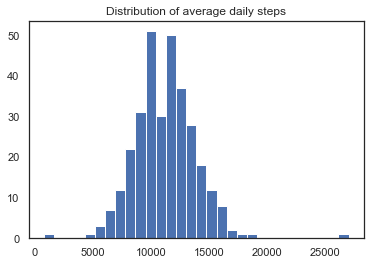

In [301]:
# Plot distribution for average daily steps of the Fitbit users
plt.hist(activity_sleep_clean.groupby('egoid')['steps'].mean(), bins=30) # calculate average steps for each ID and plot histogram of the averages
plt.title('Distribution of average daily steps') 
plt.show()

In [259]:
# percent of users that take an average of 10,000 or more steps/day
avg_daily_steps = activity_sleep_clean.groupby('egoid')['steps'].mean() # average daily steps for each user 
count = sum([i >= 10000 for i in avg_daily_steps])  # number of individuals who, on average, take 10,000 or more steps/day

count/len(avg_daily_steps)*100 # percent of users that take an average of 10,000 or more steps/day

68.0379746835443

In [260]:
activity_sleep_clean.groupby('egoid')['steps'].mean().median() # median of the average daily steps

11288.03070814725

68.0 % of the Fitbit users had an average daily step count of 10,000 or more, and the median number of daily steps was 11,288. These values were somewhat unexpected since the average American only walks around [5,000 steps per day](https://journals.lww.com/acsm-msse/Fulltext/2010/10000/Pedometer_Measured_Physical_Activity_and_Health.4.aspx), but it's possible that Notre Dame students get unusually high step counts from walking around campus. 

--

We can use step counts to categorize Fitbit users by [physical activity status](https://pubmed.ncbi.nlm.nih.gov/14715035/):  
- <5,000 steps/day: sedentary
- 5,000-7,499 steps/day: low active
- 7,500-9,999 steps/day: somewhat active
- 10,000 steps/day: active
- 12,500 steps/day: highly active

In [261]:
sedentary = len([i for i in avg_daily_steps if i < 5000])  # count number of values where daily steps < 5000
low_active = len([i for i in avg_daily_steps if i >= 5000 if i <= 7499 ])
somewhat_active = len([i for i in avg_daily_steps if i >= 7500 if i <= 9999])
active = len([i for i in avg_daily_steps if i >= 10000 if i < 12000])
highly_active = len([i for i in avg_daily_steps if i >= 12000])

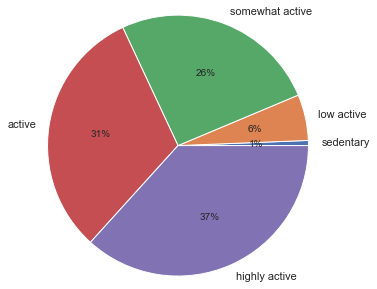

In [262]:
active_status = ['sedentary', 'low active', 'somewhat active', 'active', 'highly active']
percent_of_users = (np.array([sedentary, low_active, somewhat_active, active, highly_active])/activity_sleep_clean['egoid'].nunique())*100
plt.pie(percent_of_users, labels=active_status, autopct='%.0f%%', radius=1.5) # plot pie chart of the active status of users
plt.show()

37% of the Fitbit users were highly active, 31% were active, 26% were somewhat active, 6% were low active, and 1% were sedentary. 

**5.2 Active minutes** <a class="anchor" id="step-5.2"></a>

The [World Health Organization](https://www.who.int/news-room/fact-sheets/detail/physical-activity) and the [Centers for Disease Control](https://www.cdc.gov/physicalactivity/basics/adults/index.htm) (CDC) recommend 150 minutes of moderate-to-vigorous physical activity (MVPA) per week for adults. 

The intensity of physical activity is measured in terms of [metabolic equivalents (METs)](https://www.hsph.harvard.edu/obesity-prevention-source/moderate-and-vigorous-physical-activity/). METs indicate the relative rate at which a person burns calories during an activity:  
- Sedentary: Uses 1.5 or fewer METs. Examples are sitting, reclining, or lying down.
- Light intensity: Uses from 1.6-3.0 METs. Examples are walking at a leisurely pace or standing in line at the store.
- Moderate intensity: Uses from 3.0-6.0 METs. Examples are walking briskly (4 mph), vacuuming, or raking leaves.
- Vigorous intensity: Uses from 6.0+ METs. Examples are walking very quickly, jogging (6 mph) running, aerobics class, or shoveling snow. 

Fitbit logs [active minutes](https://help.fitbit.com/articles/en_US/Help_article/1379.htm) after an individual spends at least 10 consecutive minutes in an activity at or above 3 METs. Fitbit defines ['fairly active minutes'](https://www.fitabase.com/media/1930/fitabasedatadictionary102320.pdf) as total minutes spent in moderate intensity during an activity, and defines 'very active minutes' as total minutes spent during a vigorous intensity activity.

__

Let's determine the percentage of the Fitbit users that get the recommended amount of MVPA. 

In [263]:
# create columns for year, week number, and mvpa minutes (fairly active minutes + very active minutes)
activity_sleep_clean['year'] = activity_sleep_clean['datadate'].dt.year
activity_sleep_clean['week'] =  activity_sleep_clean['datadate'].dt.isocalendar()['week']
activity_sleep_clean['mvpaminutes'] = activity_sleep_clean['fairlyactiveminutes']+activity_sleep_clean['veryactiveminutes']

In [264]:
# average weekly MVPA for each user 
weekly_mvpa = np.array([activity_sleep_clean.groupby(['egoid', 'year', 'week'])['mvpaminutes'].sum()[i].mean() for i in activity_sleep_clean['egoid'].unique()])

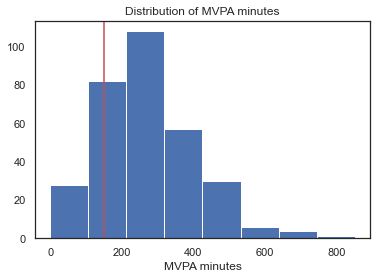

In [293]:
plt.hist(weekly_mvpa, bins=8) # plot the distribution of average weekly MVPA 
plt.axvline(x=150,color='r', linewidth=1.5) # plot line at x= 150 minutes
plt.title('Distribution of MVPA minutes')
plt.xlabel('MVPA minutes')
plt.show()

In [266]:
# calculate the percent of people who get sufficient MVPA each week
mvpa_count = sum([i > 150 for i in weekly_mvpa])
(mvpa_count/len(weekly_mvpa))*100  # percent of people who meet the WHO and CDC guidelines for MVPA 

83.22784810126582

83.2% of the Fitbit users get at least 150 minutes of weekly MVPA. 

**5.3 Sleep** <a class="anchor" id="step-5.3"></a>

The CDC recommends [7 or more hours of sleep]((https://www.cdc.gov/sleep/about_sleep/how_much_sleep.html) for adults. 

In [267]:
activity_sleep_clean.describe()['minsasleep']

count    166525.000000
mean        382.173758
std         141.656396
min           1.000000
25%         318.000000
50%         410.000000
75%         476.000000
max        1295.000000
Name: minsasleep, dtype: float64

In the sleep dataset, the minimum number of minutes asleep is 1, the mean is 382, the median is 410, and the max is 1,295. 

In [268]:
# calculate the average minutes slept for each user 
avg_daily_sleep = activity_sleep_clean.groupby('egoid')['minsasleep'].mean()

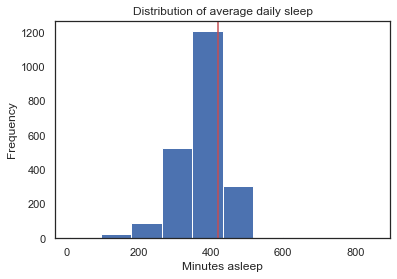

In [295]:
plt.hist(avg_daily_sleep)
plt.axvline(x=420,color='r', linewidth=1.5)
plt.title('Distribution of average daily sleep') 
plt.xlabel('Minutes asleep')
plt.ylabel('Frequency')
plt.show()

In [270]:
# percent of users that get the recommended 7 hours of sleep
(len([i for i in avg_daily_sleep if i >= 420])/len(avg_daily_sleep))*100

16.455696202531644

Only 16.5% of the Fitbit users get the recommended amount of sleep. This result is unsurprising, considering that most of the sample consists of college students. Furthermore, the CDC estimates that [1 in 3 adults don't get enough sleep](https://www.cdc.gov/media/releases/2016/p0215-enough-sleep.html). 

**5.4 Activity, sleep, and compliance throughout the week** <a class="anchor" id="step-5.4"></a>

Activity:

In [271]:
activity_sleep_clean['dayofweek'] = activity_sleep_clean['datadate'].dt.day_name() # create a column for day of the week 
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [272]:
avg_daily_steps = activity_sleep_clean.groupby(['dayofweek', 'egoid'])['steps'].mean() # average daily steps of each user for each day of the week
avg_daily_mvpa = activity_sleep_clean.groupby(['dayofweek', 'egoid'])['mvpaminutes'].mean() # average daily mvpa of each user for each day of the week

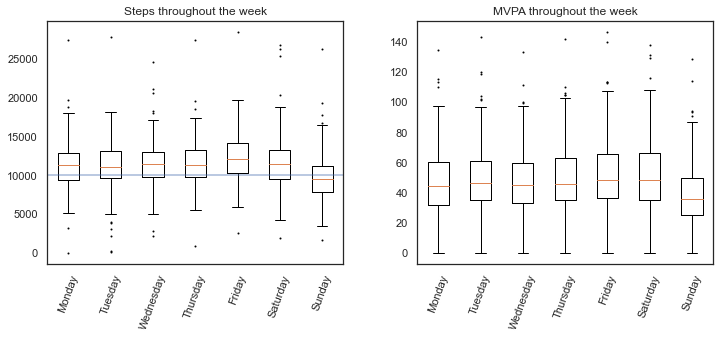

In [296]:
# Steps throughout the week
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
fig.tight_layout()
ax1.boxplot([avg_daily_steps[i] for i in days_of_week], labels=days_of_week, flierprops={'markersize':1})
ax1.set_title('Steps throughout the week')
ax1.axhline(y=10000, alpha=0.5)
ax1.tick_params(axis='x', rotation=70)

# MVPA throughout the week  
ax2.boxplot([avg_daily_mvpa[i] for i in days_of_week], labels=days_of_week, flierprops={'markersize':1})
ax2.set_title('MVPA throughout the week')
ax2.tick_params(axis='x', rotation=70)
plt.subplots_adjust(wspace=0.25)
plt.show()

The upper whisker boundary is the largest data point within 1.5 interquartile range (IQR) above the third quartile. The lower whisker boundary is the smallest data point within 1.5 IQR below the first quartile

In [274]:
# create dictionary to show median steps for each day of the week 
steps_dict = {}
steps_values = [avg_daily_steps[i].median() for i in days_of_week] # make list of median steps for each day of the week
steps_dict = {days_of_week[i]: steps_values[i] for i in range(0,7)} # assign the medians to the corresponding day of the week

In [275]:
steps_dict  # display median steps for each day of the week 

{'Monday': 11296.892857142857,
 'Tuesday': 11111.66369047619,
 'Wednesday': 11376.598445753141,
 'Thursday': 11371.015789473684,
 'Friday': 12078.631588999237,
 'Saturday': 11495.410119047618,
 'Sunday': 9522.5625}

Median values are reported since the data distribution is skewed. 

Friday had the highest median steps, while Sunday had the lowest. Sunday was the only day that had a median value lower than the recommended 10,000 steps. 

In [276]:
# create dictionary to show median MVPA minutes for each day of the week 
mvpa_dict = {}
mvpa_values = [avg_daily_mvpa[i].median() for i in days_of_week] # make list of median MVPA minutes for each day of the week
mvpa_dict = {days_of_week[i]: mvpa_values[i] for i in range(0,7)} # assign the medians to the corresponding day of the week

In [277]:
mvpa_dict # display median MVPA minutes for each day of the week 

{'Monday': 44.0,
 'Tuesday': 45.97418719211823,
 'Wednesday': 44.65714285714286,
 'Thursday': 45.684210526315795,
 'Friday': 48.36134934248142,
 'Saturday': 47.94886363636364,
 'Sunday': 35.845454545454544}

Friday had the highest median MVPA minutes and Sunday had the lowest. 

In [278]:
activity_sleep_clean['dayofweek'] = activity_sleep_clean['datadate'].dt.day_name()  # create a column for day of the week 

In [279]:
avg_daily_sleep = activity_sleep_clean.groupby(['dayofweek', 'egoid'])['minsasleep'].mean() # average minutes asleep for each ID on each day of the week

Sleep:

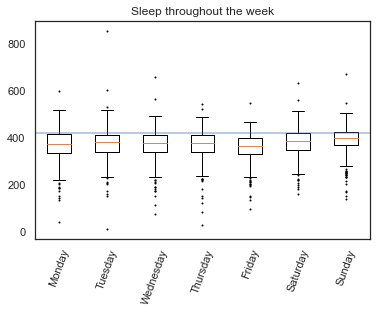

In [297]:
# sleep throughout the week 
plt.boxplot([avg_daily_sleep[i] for i in days_of_week], labels=days_of_week, flierprops={'markersize':1})
plt.xticks(rotation=70)
plt.axhline(y=420, alpha=0.5)
plt.title('Sleep throughout the week')
plt.show()

In [281]:
# create dictionary to show median minutes asleep for each day of the week 
sleep_dict = {}
sleep_values = [avg_daily_sleep[i].median() for i in days_of_week] # make list of median min asleep for each day of the week
sleep_dict = {days_of_week[i]: sleep_values[i] for i in range(0,7)} # assign the medians to the corresponding day of the week

In [282]:
sleep_dict # display median minutes asleep for each day of the week 

{'Monday': 374.2463768115942,
 'Tuesday': 379.31036176133574,
 'Wednesday': 377.0,
 'Thursday': 377.8318729463308,
 'Friday': 365.98511904761904,
 'Saturday': 386.1034110535406,
 'Sunday': 400.0421052631579}

Sunday had the highest median number of minutes asleep; Friday had the lowest. The median values for each day of the week were all below the recommended 420 hours of sleep. 

Compliance: 

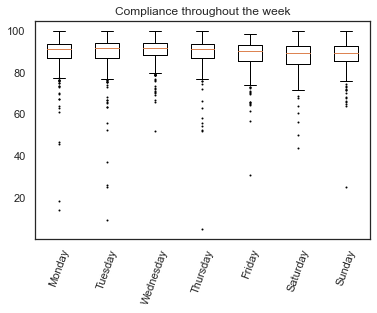

In [287]:
avg_comply_percent = activity_sleep_clean.groupby(['dayofweek', 'egoid'])['complypercent'].mean() 

plt.boxplot([avg_comply_percent[i] for i in days_of_week], labels=days_of_week, flierprops={'markersize':1})
plt.xticks(rotation=70)
plt.title('Compliance throughout the week')
plt.show()

In [284]:
# create dictionary to show median minutes asleep for each day of the week 
comply_dict = {}
comply_values = [avg_comply_percent[i].median() for i in days_of_week] # make list of median min asleep for each day of the week
comply_dict = {days_of_week[i]: comply_values[i] for i in range(0,7)} # assign the medians to the corresponding day of the week

In [285]:
comply_dict

{'Monday': 91.22772277227723,
 'Tuesday': 91.63979416809605,
 'Wednesday': 92.04257246376812,
 'Thursday': 91.22955647955649,
 'Friday': 90.41452991452991,
 'Saturday': 89.35521885521885,
 'Sunday': 89.69072164948453}

[Compliance](http://sites.nd.edu/nethealth/fitbit-data/) refers to the percentage of the day that users wore their Fitbits. Saturday and Sunday had the lowest median compliance rates, while Wednesday had the highest. But overall, median compliance scores were similar throughout the week.

**5.5 Correlations** <a class="anchor" id="step-5.5"></a>

Finally, I will plot a correlation matrix to determine whether certain variables are correlated. 

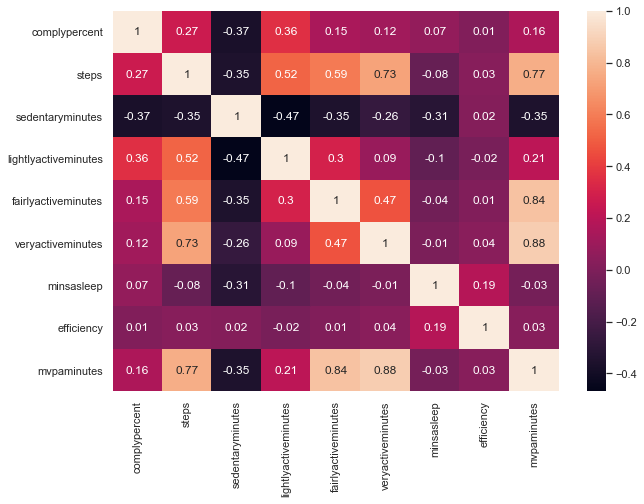

In [288]:
df = activity_sleep_clean.drop(columns=['egoid', 'year', 'week']) # filter out variables 

matrix = df.corr('pearson').round(2)
sns.set(rc={'figure.figsize':(10,7)})
sns.heatmap(matrix, annot=True)
plt.show()

The Pearson correlation coefficient (r) measures the strength and direction of the relationship between two variables. The relationship between two variables is considered strong when r is larger than 0.7. The following variables were strongly correlated: 
* steps and MVPA minutes
* steps and very active minutes

The association between steps and MVPA minutes suggests that walking can be used to meet the MVPA guidelines. Instead of trying to meet walking guidelines and MVPA guidelines separately, individuals can walk to achieve both goals. 

Note: There are strong correlations between MVPA minutes and fairly active minutes, and between MVPA minutes and very active minutes. But this is expected since MVPA minutes are calculated as the sum of sedentary minutes and active minutes. 

## 6. Conclusions  <a class="anchor" id="step-6"></a>

**6.1 Summary of findings** <a class="anchor" id="step-6.1"></a>
- Most of the Fitbit users got the recommended number of daily steps and weekly amount of MVPA. 68.3% of the users had average step count of 10,000 or greater, and 83.2% averaged at least 150 minutes of weekly MVPA. 
- Based on average daily step counts, 68% of the Fitbit users were considered active or highly active, 26% were considered somewhat active, and 7% were considered low active or sedentary. 
- Only 16.5% of the Fitbit users got the recommended amount of sleep. 
- There was a positive correlation between steps and MVPA minutes.  

**6.2 Top insights and recommendations** <a class="anchor" id="step-6.2"></a>
- The samples in this analysis may not be representative of Bellabeat's users, so Bellabeat should request permission to collect data from its customers and conduct another analysis. 
- Marketing should focus on how the Bellabeat app will keep users accountable for healthy habits and fitness goals. 
- Encourage users to walk. Higher step counts help users meet the recommended weekly 150 minutes of MVPA. Sufficient MVPA is associated with lower risk of all-cause mortality.
- Incentivize less active users to walk more by offering discounts for products or by sending notifications. For example, Bellabeat can send exercise reminders near the end of the week if the user has not accumulated sufficient MVPA minutes. Bellabeat can also offer discounts to low active or sedentary users who improve their habits and consistently rank as active for a specified duration of time. 
- Marketing should also focus on how the Bellabeat app can help users improve sleep by offering meditations and breathing exercises. 
